# Exploratory Data Analysis & Visualisation

This notebook will teach you how to explore and visualise your clean data.

**What we'll learn:**
1. Load our clean data
2. Create basic visualisations
3. Understand relationships between variables
4. Create correlation heatmaps
5. Make histograms and bar charts
6. Create scatter plots

**Instructions:**
- Make sure you've run the data cleaning notebook first
- Upload your clean CSV file to Google Colab
- Run each cell one by one

In [ ]:
# Import libraries for data analysis and visualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set up nice-looking plots
plt.style.use('default')
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


## 1. Load Your Clean Data

Let's load the data we cleaned in the previous notebook.

In [11]:
# Load your clean data - change filename if needed
df = pd.read_csv('../datasets/cleaned_data.csv')

print(f"Data loaded successfully!")
print(f"Shape: {df.shape[0]} rows × {df.shape[1]} columns")

# Quick look at the data
df.head()

Data loaded successfully!
Shape: 64620 rows × 11 columns


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
2,2025,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
3,2025,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M
4,2025,EN,FT,Data Engineer,80000,USD,80000,US,0,US,M


## 2. Correlation Heatmap

Let's see how numerical variables relate to each other using a correlation heatmap.

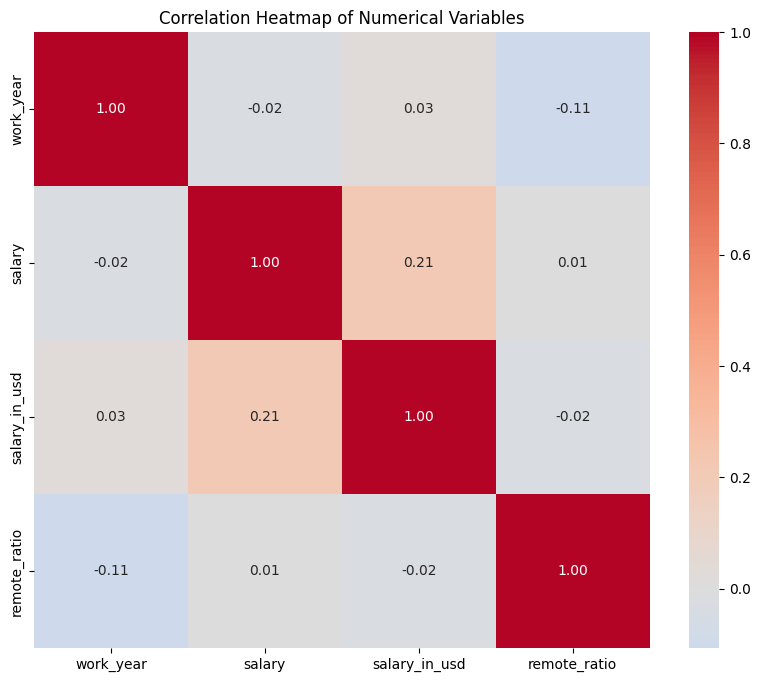

How to read this heatmap:
- Values close to 1 = strong positive relationship
- Values close to -1 = strong negative relationship
- Values close to 0 = no relationship


In [12]:
# Create correlation heatmap for numerical columns
numerical_cols = df.select_dtypes(include=[np.number])

if len(numerical_cols.columns) > 1:
    # Calculate correlations
    correlations = numerical_cols.corr()
    
    # Create the heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlations, annot=True, cmap='coolwarm', center=0, 
                square=True, fmt='.2f')
    plt.title('Correlation Heatmap of Numerical Variables')
    plt.show()
    
    print("How to read this heatmap:")
    print("- Values close to 1 = strong positive relationship")
    print("- Values close to -1 = strong negative relationship") 
    print("- Values close to 0 = no relationship")
else:
    print("Need at least 2 numerical columns for correlation analysis")

## 3. Distribution Plots

Let's look at how our data is distributed using histograms.

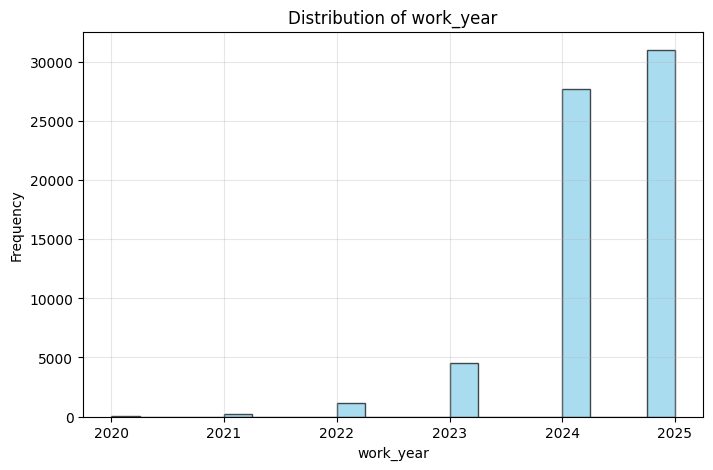

Summary for work_year:
  Mean: 2024.36
  Median: 2024.00
  Standard deviation: 0.73



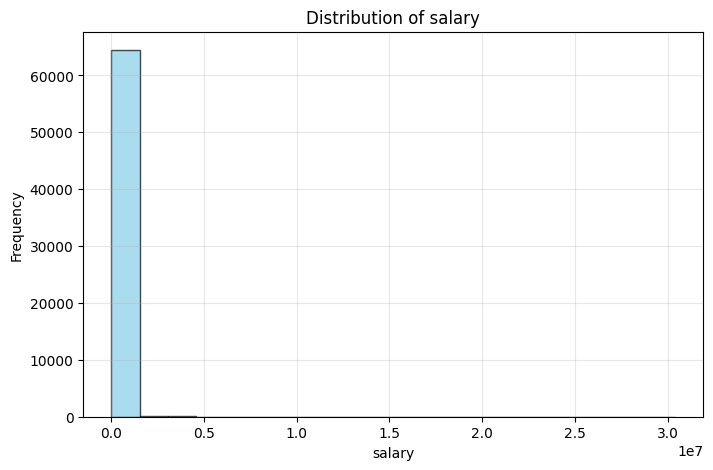

Summary for salary:
  Mean: 162305.95
  Median: 139900.00
  Standard deviation: 298228.40



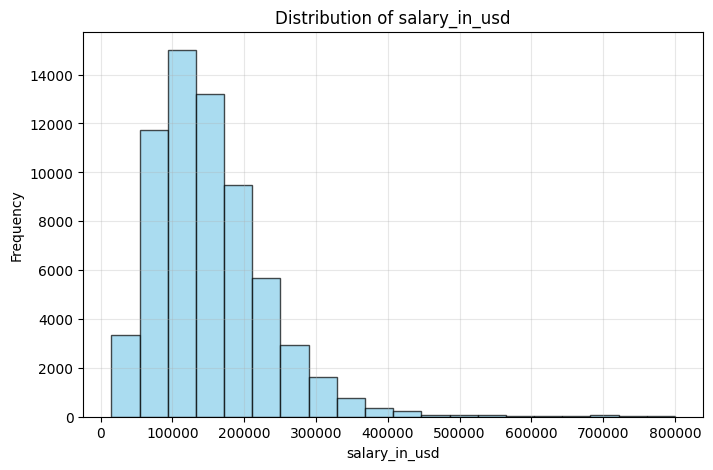

Summary for salary_in_usd:
  Mean: 151230.19
  Median: 138900.00
  Standard deviation: 77530.27



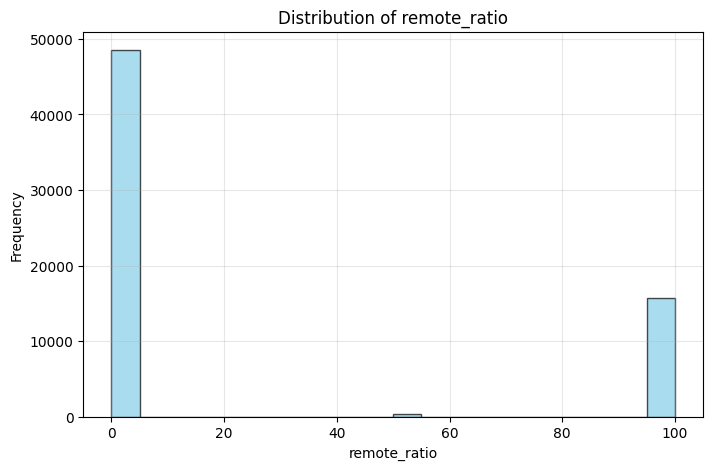

Summary for remote_ratio:
  Mean: 24.64
  Median: 0.00
  Standard deviation: 42.95



In [13]:
# Create histograms for numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns

for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    plt.hist(df[col].dropna(), bins=20, color='skyblue', alpha=0.7, edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True, alpha=0.3)
    plt.show()
    
    print(f"Summary for {col}:")
    print(f"  Mean: {df[col].mean():.2f}")
    print(f"  Median: {df[col].median():.2f}")
    print(f"  Standard deviation: {df[col].std():.2f}")
    print()

## 4. Categorical Data Visualisation

Let's create bar charts to understand our categorical (text) data.

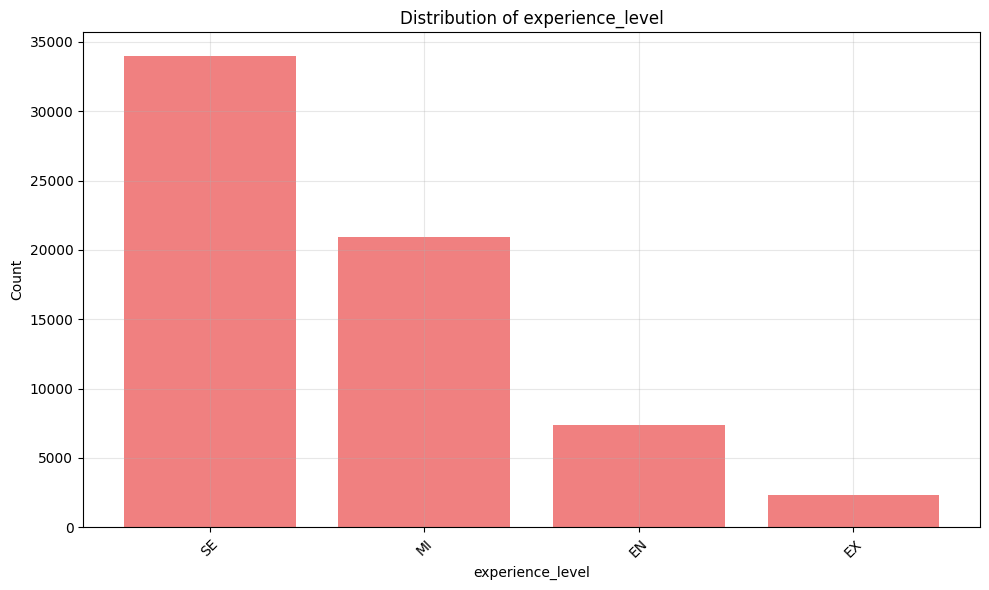

Top 5 values in experience_level:
experience_level
SE    33997
MI    20908
EN     7400
EX     2315
Name: count, dtype: int64



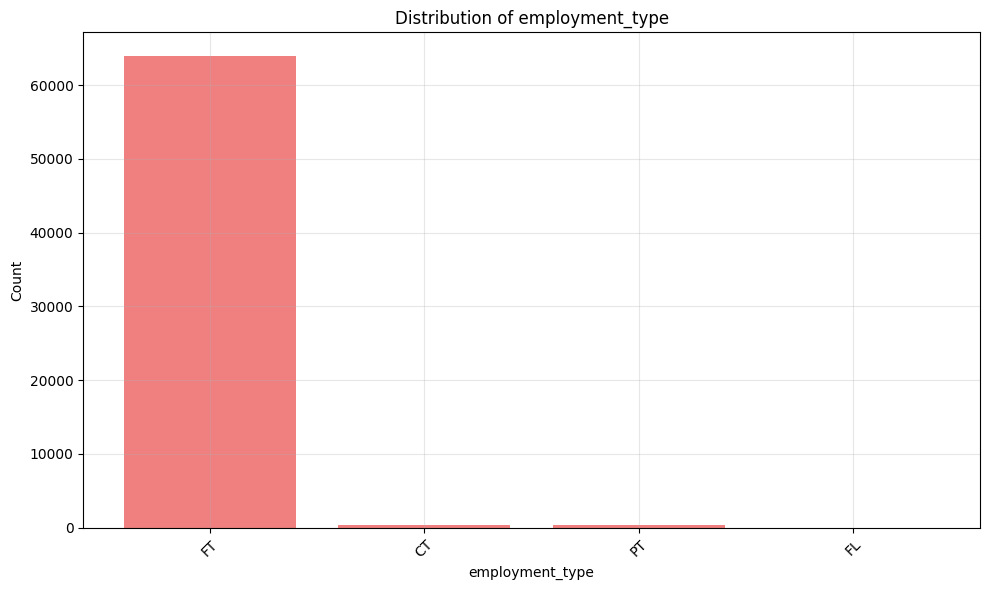

Top 5 values in employment_type:
employment_type
FT    63951
CT      338
PT      315
FL       16
Name: count, dtype: int64

Skipping job_title - too many categories (390)
Skipping salary_currency - too many categories (26)
Skipping employee_residence - too many categories (102)
Skipping company_location - too many categories (95)


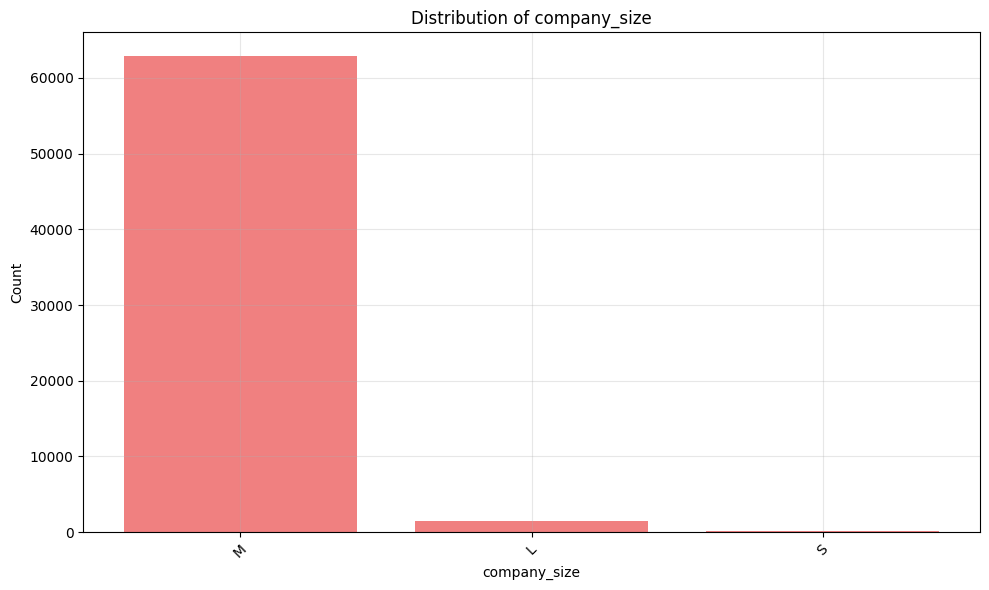

Top 5 values in company_size:
company_size
M    62887
L     1521
S      212
Name: count, dtype: int64



In [14]:
# Create bar charts for categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    # Only plot if not too many categories
    if df[col].nunique() <= 15:
        plt.figure(figsize=(10, 6))
        value_counts = df[col].value_counts()
        
        plt.bar(range(len(value_counts)), value_counts.values, color='lightcoral')
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(range(len(value_counts)), value_counts.index, rotation=45)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
        
        print(f"Top 5 values in {col}:")
        print(value_counts.head())
        print()
    else:
        print(f"Skipping {col} - too many categories ({df[col].nunique()})")

## 5. Scatter Plots

Let's explore relationships between two numerical variables.

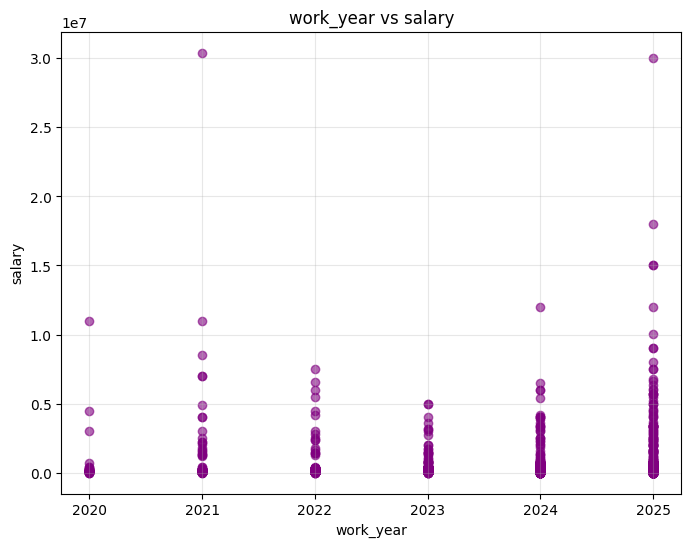

Correlation between work_year and salary: -0.021

To create other scatter plots, change the column names:
Available numerical columns: ['work_year', 'salary', 'salary_in_usd', 'remote_ratio']


In [15]:
# Create scatter plots for pairs of numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns

if len(numerical_cols) >= 2:
    # Example: Create a scatter plot for the first two numerical columns
    x_col = numerical_cols[0]
    y_col = numerical_cols[1]
    
    plt.figure(figsize=(8, 6))
    plt.scatter(df[x_col], df[y_col], alpha=0.6, color='purple')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f'{x_col} vs {y_col}')
    plt.grid(True, alpha=0.3)
    plt.show()
    
    # Calculate correlation
    correlation = df[x_col].corr(df[y_col])
    print(f"Correlation between {x_col} and {y_col}: {correlation:.3f}")
    
    print(f"\nTo create other scatter plots, change the column names:")
    print(f"Available numerical columns: {list(numerical_cols)}")
else:
    print("Need at least 2 numerical columns for scatter plots")

## 6. Box Plots by Category

Let's see how numerical values differ across different categories.

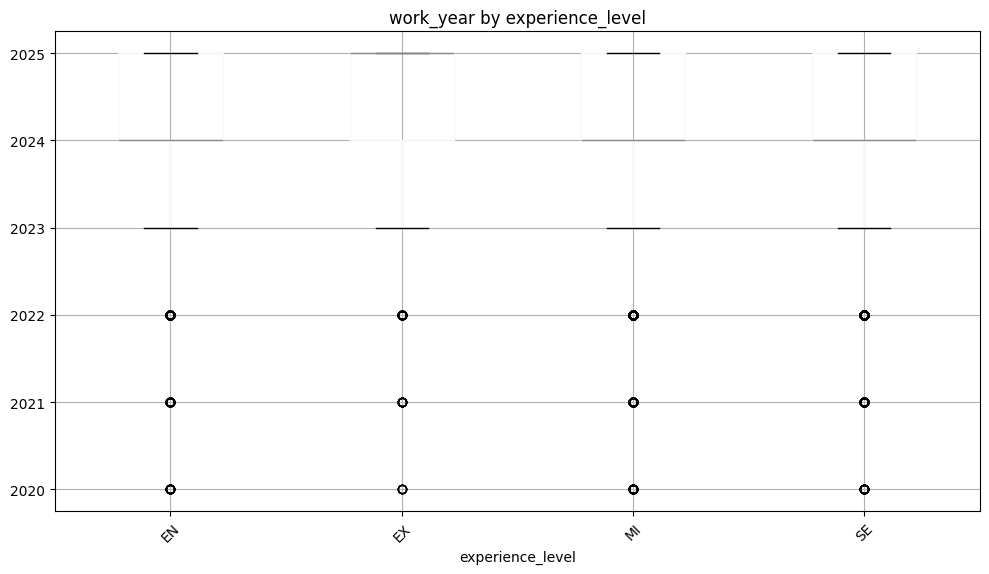

This shows how work_year varies across different experience_level

To create other box plots, try different combinations:
Numerical columns: ['work_year', 'salary', 'salary_in_usd', 'remote_ratio']
Categorical columns: ['experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence', 'company_location', 'company_size']


In [16]:
# Create box plots to compare numerical values across categories
numerical_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(include=['object']).columns

if len(numerical_cols) > 0 and len(categorical_cols) > 0:
    # Example: First numerical column vs first categorical column
    num_col = numerical_cols[0]
    cat_col = categorical_cols[0]
    
    # Only plot if categorical column has reasonable number of categories
    if df[cat_col].nunique() <= 10:
        plt.figure(figsize=(10, 6))
        df.boxplot(column=num_col, by=cat_col, ax=plt.gca())
        plt.title(f'{num_col} by {cat_col}')
        plt.suptitle('')  # Remove automatic title
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        
        print(f"This shows how {num_col} varies across different {cat_col}")
    else:
        print(f"Too many categories in {cat_col} ({df[cat_col].nunique()}) for box plot")
        
    print(f"\nTo create other box plots, try different combinations:")
    print(f"Numerical columns: {list(numerical_cols)}")
    print(f"Categorical columns: {list(categorical_cols)}")
else:
    print("Need both numerical and categorical columns for box plots")

## 7. Summary and Next Steps

**What we've learned:**
- How to create correlation heatmaps to see relationships
- How to visualise data distributions with histograms  
- How to compare categories with bar charts
- How to explore relationships with scatter plots
- How to compare groups with box plots

**Key insights to look for:**
- Strong correlations (close to 1 or -1) in the heatmap
- Unusual distributions in histograms (skewed, multiple peaks)
- Clear patterns in scatter plots
- Differences between groups in box plots

**Next steps:**
- Try changing column names in the code to explore different relationships
- Look for interesting patterns and outliers
- Think about what the visualisations tell you about your data